# Линейная регрессия
## Модель линейной регрессии
Модели машинного обучения устанавливают некоторую зависимость выходов от входов, т.е. задают правила, как посчитать выход, зная вход и параметры модели. В зависимости от того, каковы эти правила, различают и разные модели.

Одни из самых простых правил - **линейные**.

Линейные модели задают зависимости вида:

(y - выход, x- вход, a и b - параметры)

\\(y=a*x+b\\)

Здесь вход x умножается на параметр a и к этому прибавляется параметр b.

Вход и выход могут быть векторами. Пусть х и y - вектора, в этом случае зависимость похожа, но теперь A это матрица параметров, а b - вектор и производится *матричное* умножение. Как вы помните, при матричном умножении необходимо соблюдать размерность, количество столбцов в матрице А равно количеству элементов в векторе х, а количество строк в матрице А равно количеству элементов в векторе у и равно количеству элементов в векторе b.

$ \overrightarrow{y}=A*\overrightarrow{x}+\overrightarrow{b} \\ \
\\
\overrightarrow{x} - вектор\ размерности\ N \\
\overrightarrow{y} - вектор\ размерности\ M \\
\overrightarrow{b} - вектор\ размерности\ M \\
A - матрица\ размерности\ M*N \\ $


Линейные зависимости очень просты, их легко считать, линейные модели легко обучать, но - всегда есть но - они хороши только для простых данных с почти линейными зависимостями, а такое бывает очень редко. Все же линейная модель это первое, что стоит попробовать при решении задачи, часто они используются как начальный вариант с другими моделями. Модели, которые не являются линейными, называются **нелинейными**, с ними познакомимся в другой раз.

Следует указывать также, по какой переменной модель линейна, может быть так, что она линейна по входу, но не по параметрам, а может наоборот. Линейная регрессия линейна и по входу и по параметрам.

## Обучение линейной регрессии. Итерационный метод наименьших квадратов.
Мы задали модель, теперь ее нужно обучить. Обучить - значит подобрать параметры так, чтобы ошибка была как можно меньше. Нужно задать и посчитать ошибку.

Много способов придумано для расчета ошибки, пожалуй самый распространенный из них это **метод наименьших квадратов** (МНК).

В методе наименьших квадратов ищут такие параметры, которые дали бы наименьшее значение суммы квадратов расстояний выходов модели от заданных (указаний учителя) на заданных входах. Такая длинная и непонятная фраза, давайте посмотрим на одномерном примере.

Задано **P** примеров данных (синие точки): вход **х** и желаемый выход (указания учителя) **t**.

![img](https://drive.google.com/uc?id=1dFaEsDIqbufA3VgIlMfZ4kyi-9K7h5aW)

Если мы выбрали какие-то параметры **a** и **b**, то для любого входа **x** можем посчитать выход модели **y**. Как вы можете догадаться это будет прямая линия (зеленая).

В идеальном случае выход **y** для заданного входа **х** должен совпасть с указанием учителя **t** для этого же входа. А если не совпадает, то модель ошибается. Мы можем посчитать насколько именно ошибается модель (красная пунктирная линия). Ошибка это разница между тем что получилось и тем что должно было получиться на выходе \\(e(x)=y(x)-t(x)\\). Для каждого входа **х** эта ошибка своя, попытаемся уменьшить ее для одного входа - может увеличиться для другого. Надо сделать так, чтобы для всех входов сразу общая, суммарная, ошибка была как можно меньше. Но обратите внимание, что такая ошибка имеет знак. Если мы просто сложим ошибки разного знака (+5 и -5 например) то суммарная будет 0, но модель не угадает выходы: на одном она ошиблась в одну сторону (+5), на другом - в другую (-5). Поэтому нужно использовать не саму ошибку, а ее абсолютное значение, модуль. Модуль не очень приятная функция, она не дифференцируемая в нуле, лучше вместо модуля использовать квадрат модуля! А вот тут все прекрасно, квадрат модуля дифференцируемая функция, считается не так уж сложно и неотрицательна. Причем равняется нулю, только если аргумент равен нулю.

Итак, будем использовать функцию ошибки: сумма по всем примерам **P** квадратов разности действительного выхода **y** и желаемого выхода **t** на входных примерах **x**.


$ E=\sum_{i=1}^{P} e(x_i)^2=\sum_{i=1}^{P} (y(x_i)-t(x_i))^2\\
x_i : i-ый\ пример\ входа\\
t(x_i) : указание\ учителя\ для\ него\\
y(x_i) : выход\ модели\ для\ него \\ $

Ради математической красоты можно поделить это на 2 и на P, но мы не будем, нас волнует не конкретное значение функции ошибки, а где находится ее минимум, а умножением и делением на константы мы положение минимума не меняем.

Мы явно не написали, но функция ошибки зависит от параметров модели. Почему? Потому что от них зависит выход **y**. Изменяя параметры модели можем найти такие, для которых ошибка будет наименьшей. Отсюда и название метода наименьших квадратов - функция ошибки это сумма квадратов чего-то там, и мы ищем наименьшее ее значение.


### Градиентный спуск.
Осталось найти параметры, для которых функция ошибки минимальна. Много разных методов есть для этого.

Например, перебор: изменяем параметры, смотрим уменьшилась ли функция ошибки, если уменьшилась - запоминаем эти значения параметров, если нет - не запоминаем. И так перебираем все возможные значения параметров. Метод хороший, если у нас мало возможных значений параметров, но такое бывает крайне редко. Ну-ка посчитайте, если есть два параметра, каждый может принимать 10 значений, то сколько всего вариантов комбинаций параметров может быть? 100? Правильно, сто это не так много, переберем. А если три таких параметра? И тысячу переберем. А если таких параметров всего-то 100, сколько вариантов перебрать надо? Ой-ой, по-гуглите, есть ли у такого числа название. Даже если с начала зарождения вселенной каждую наносекунду по одному варианту перебирать, то так все и не переберем, вот проклятье! Такая ситуация, что количество вариантов перебора растет очень-очень быстро так и называется **проклятие размерности**. Нет, переборы нам не нужны.

Ну ладно, другой вариант: Если присмотреться к функции ошибки, то поймем, что от параметров она зависит квадратично. Всего-то нужно решить квадратное уравнение. И это можно сделать. Но мы не будем. Все хорошо только потому, что функция ошибки квадратична по параметрам. Это прекрасное свойство для линейных моделей, но вот для нелинейных это не так. Хотелось бы все-таки метод, который к любым, ну или большинству, моделям подходил.

И такой метод есть - это **градиентный спуск**, нет, лучше, **ГРАДИЕНТНЫЙ СПУСК**. Большие буквы заслужены, этот метод является основой основ машинного обучения, ему мы обязаны современными чудесными приложениями. Чтобы понять суть метода нужно вспомнить, что такое **производная**.

Представьте, что вы стоите на горе с закрытыми глазами. Вам надо спуститься вниз. Вы не видите где этот низ расположен, но чувствуете, куда поверхность опускается, и можете понять, идти ли вам направо или налево, чтобы спускаться. Ах, вот если бы для функции, не видя ее графика, можно было понять, она увеличивается или уменьшается в конкретной точке. Но как раз это и показывает производная функции. Если производная больше нуля - функция возрастает, если меньше нуля - убывает, а если ноль - то не изменяется с ростом аргумента. Нам нужен минимум функции ошибки, значит двигаться надо в сторону ее убывания. Вы, стоя на горе, можете сделать маленький шаг в направлении низа, и мы можем немножко изменить параметр модели в том направлении, куда функция ошибки убывает. А потом еще раз, и еще раз, и еще. Дойдем до низа, производная станет равна нулю. Если перескочим (ну вот такие длинные шаги), сразу почувствуем что направление изменилось и низ с другой стороны, а производная изменит знак.

Все что нам нужно сделать, так это считать производную функции ошибки по параметру и изменять его, постепенно увеличивая или уменьшая в зависимости от знака (и величины) производной. В многомерном случае, когда параметров много, нам нужно считать производные функции ошибки по каждому из них, 100 параметров - 100 производных посчитать надо. Вектор, составленный из производных функции ошибки по каждому параметру называют **градиентом**.

Итак, в методе градиентного спуска мы считаем вектор градиента и изменяем вектор параметров в направлении антиградиента (т.е. "минус" градиента). Так делаем несколько раз *итеративно* (в цикле).
Пусть **t** - номер текущей итерации, **w(t)** - параметр модели, на этой итерации , **E(t)** - функция ошибки на этой итерации, зависящая от всех параметров, входов, и указаний учителя, тогда на следующей итерации **t+1** параметр в методе градиентного спуска задается как:

\\(w(t+1)=w(t)-s*\frac{\partial E(t)}{\partial w}\\)

то есть новое значение параметра равно текущему значения *минус* производная функция ошибки по этому параметру умноженная на коэффициент **s**. Минус потому, что нужно в сторону уменьшения функции ошибки двигаться. Коэффициент **s** (вместе с величиной производной) определяет длину шага, как сильно мы изменяем параметр. Его задают вручную, но есть и методы для автоматического подбора шага. Для краткости называют его "шаг" обучения (learning rate).

Это очень простой метод, но в нем есть много подводных камней, мы про них поговорим отдельно на других занятиях, пока попробуйте самостоятельно понять какие трудности с ним могут возникнуть.    

Теперь мы знаем как обучить линейную регрессию, давайте это и сделаем.

### Генерация данных
Сгенерируем данные, которые похожи на линейную зависимость, но все же не точно линейны.

In [1]:
import numpy as np # подключим библиотеку для работы с массивами

np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были одинаковые

x = np.random.randn(1, 100) #(100, 1) # генерируем случайно несколько примеров входа, одномерный.
a, b = 2, 1 # коэффициенты зависимости в данных
eps = .1 * np.random.randn(1, 100) # шум с нормальным распределением
y = b + a*x + eps # примеры выхода

x.shape, y.shape

((1, 100), (1, 100))

Перемешаем и разделим примеры на тестовые и обучающие.

In [2]:
new_ind = np.arange(100) #сгенерируем массив последовательных чисел по количесвту данных - индексы данных

np.random.shuffle(new_ind)# случайно перемешаем их (переставим элементы массива)
new_ind #

array([93, 28, 55, 30, 80, 17, 54, 76, 10,  9,  2, 87, 46, 98, 84, 82, 26,
       69, 85, 52, 40, 67, 99, 63, 83,  0, 45, 11, 95, 22, 66, 20, 33, 90,
       27, 37, 97, 18, 70, 86, 77, 39, 34, 29, 72, 81, 58,  3, 92,  4, 60,
       43, 78, 96, 36, 94, 53, 74,  5, 91, 51, 48, 73, 79, 68, 21, 61, 71,
       57, 88, 50, 62, 31, 65, 14, 75, 13, 15,  7, 64, 19, 44, 35, 56,  6,
       59, 12, 23, 24, 49, 25, 41, 38, 47, 42,  8, 32, 16, 89,  1])

In [3]:
train_idx = new_ind[:70]# первую часть индексов (с 0 до 69) определим как обучающие
test_idx = new_ind[70:]# вторую часть индексов (с 70 до конца=99) определим как тестовые
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x[0][train_idx], y[0][train_idx]# обучающие вход и желаемый выход
x_test, y_test = x[0][test_idx], y[0][test_idx]# тестовые вход и желаемый выход


Посмотрим на полученные данные. Мы используем  написанную функцию `plot_line_or_scatter` для отрисовки. Функция основана на matplotlib и в файле можно посмотреть на ее реализацию.



In [4]:
# Функция для рисования линейных или точечных графиков
import matplotlib.pyplot as plt
def plot_line_or_scatter(type_plot, x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):
    # Create the plot object
    _, ax = plt.subplots()

    if type_plot == 'scatter':
        ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    else:
        ax.plot(x_data, y_data, lw = 2, color = color, alpha = 1)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

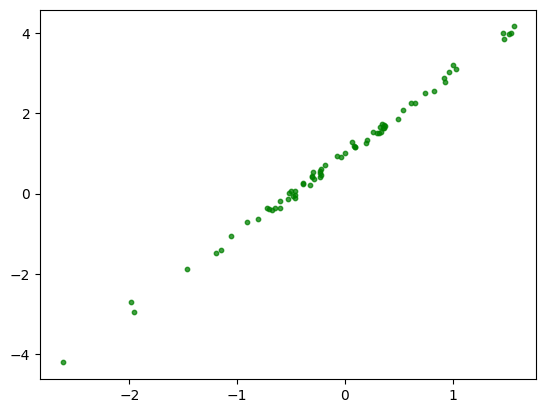

In [5]:
plot_line_or_scatter('scatter', x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа

Зависимость между входом **x** и выходом **y** получилась почти линейная, как мы и хотели.

### Обучение модели
Теперь забудем что мы делали данные сами, представим, что нам их кто-то дал и велел сказать, какая зависимость между входом и выходом в этих данных.

Предположим, что зависимость линейная, тогда мы можем узнать коэффициенты этой зависимости с помощью линейной регрессии.

Процесс обучения линейной регрессии итерационный, на каждом шаге мы от старых значений параметров отнимаем величину, зависящую от производной функции ошибки по этому параметру. Но итерации надо с чего-то начать, т.е. у нас должны быть "старые" значения параметров еще до начала итераций. Указание таких "старых" значений называется **инициализацией**, параметры нужно инициализировать. Это одна из проблем градиентного спуска и итерационных методов вообще. От того как мы инициализируем параметры будет зависеть и скорость обучения и результат обучения и сможет ли модель вообще чему-то полезному обучиться. Когда не знаешь как лучше - делай случайно: инициализируем параметры случайными числами из нормального распределения.

В линейной регрессии для одномерных величин мы имеем два параметра: коэффициент (множитель) **a**  и смещение (слагаемое) **b**.

In [5]:
a =  np.random.randn(1)# случайное число для параметра a
a

array([-0.23739196])

In [6]:
b = np.random.rand(1)# случайное число для параметра b
b

array([0.09783416])

Обучать будем методом наименьших квадратов, для него нужно задать несколько гиперпараметров: шаг обучения  и количество итераций обучения, назовем их эпохами.

In [7]:
lr = 1e-3 # шаг обучения
epochs = 990 # количество эпох


In [8]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть

    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a

    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b

    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 3.930877   a=-0.234  b=0.099
ep:  20  loss: 3.719706   a=-0.177  b=0.129
ep:  40  loss: 3.520057   a=-0.121  b=0.158
ep:  60  loss: 3.331291   a=-0.066  b=0.186
ep:  80  loss: 3.152803   a=-0.013  b=0.213
ep: 100  loss: 2.984023   a=0.039  b=0.239
ep: 120  loss: 2.824415   a=0.090  b=0.264
ep: 140  loss: 2.673470   a=0.139  b=0.289
ep: 160  loss: 2.530711   a=0.187  b=0.312
ep: 180  loss: 2.395686   a=0.234  b=0.334
ep: 200  loss: 2.267969   a=0.279  b=0.356
ep: 220  loss: 2.147159   a=0.323  b=0.377
ep: 240  loss: 2.032876   a=0.367  b=0.398
ep: 260  loss: 1.924763   a=0.409  b=0.417
ep: 280  loss: 1.822480   a=0.450  b=0.436
ep: 300  loss: 1.725710   a=0.490  b=0.454
ep: 320  loss: 1.634150   a=0.529  b=0.472
ep: 340  loss: 1.547516   a=0.567  b=0.489
ep: 360  loss: 1.465540   a=0.604  b=0.505
ep: 380  loss: 1.387968   a=0.640  b=0.521
ep: 400  loss: 1.314560   a=0.675  b=0.537
ep: 420  loss: 1.245089   a=0.709  b=0.551
ep: 440  loss: 1.179342   a=0.742  b=0.566
ep: 46

/tmp/ipython-input-282680933.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки


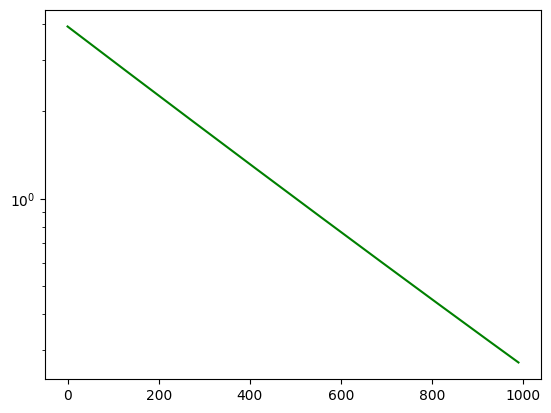

In [9]:
# посмотрим на функцию ошибки
from matplotlib import pyplot as plt  #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

Запускайте цикл обучения несколько раз, смотрите, как обучается модель.

В итоге, мы пришли к *почти* тем же самым параметрам, которые использовались при создании данных, т.е. установили зависимость. Проверим на тестовых данных.

Сначала рассчитаем выходы модели на тестовых примерах входов `x_test`.
У нас уже были соответствующие желаемые тестовые выходы для них в `y_test`.
Построим их.

In [10]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test

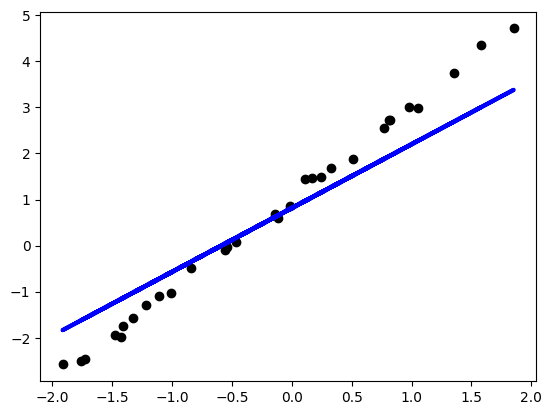

In [11]:
# нарисуем
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

Получилось довольно точное приближение, значит мы обучили линейную регрессию правильно.
### Библиотека `sklearn`
Давайте сделаем тоже самое с помощью библиотеки. Будем использовать библиотеку [`sklearn`](https://scikit-learn.org/stable/) в которой реализовано множество моделей, в том числе и линейная регрессия.  
Модели вообще и линейная регрессия в частности реализуются специальными классами для которых реализованы методы обучения, расчета выхода, ошибки и другие функции. Линейная регрессия представлена в [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Давайте подключим эту модель из `sklearn.linear_model` и создадим объект такого класса.

Для модели линейной регрессии реализовано несколько методов:
* `fit()` -  для обучения моделей. Мы указываем массив примеров входов, массив примеров желаемых выходов (указаний учителя) и, возможно, дополнительные аргументы. Создает дополнительно поля `coef_` для хранения множителей **a** и `intercept_` для смещений **b**. (изначально таких полей нет);
* `predict()` - расчет выходов модели при заданных входах и сохраненных в модели параметрах;
* `score()` - расчет значения функции ошибки для заданных примеров;
* `get_params()`, `set_params()` - для чтения и установки параметров модели.


В `sklearn`, да и во многих других библиотеках, принято, чтобы в массивах примеры были первым измерением, а признаки - вторым. Для регрессии одномерной величины на 70 примерах, массив примеров должен быть размером 70 на 1. За этим нужно внимательно следить, если мы перепутаем порядок измерений и подадим массивы размера 1 на 70, то вычислительной ошибки не будет, но мы решим не ту задачу: вместо регрессии одномерной величины на 70 примерах, мы найдем регрессию 70-мерной величины на одном примере. Поэтому мы принудительно переформатируем размер массивов с помощью `reshape()`. Очевидно количество примеров в массивах входа и желаемого выхода должно быть одинаковым.

*Примечание: По-видимому `sklearn` использует другой метод для обучения (на основе решения системы линейных уравнений), а не градиентный спуск, и немного другую функцию ошибки, но результат тот-же. Поэтому здесь не задается ни начальное значение параметров (инициализация), ни величина шага обучения. Это допустимо для линейной регрессии, но для более сложных случаев так не получится.*  


Обученные параметры: b=0.9860 a=1.9868


/tmp/ipython-input-2230320840.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) #


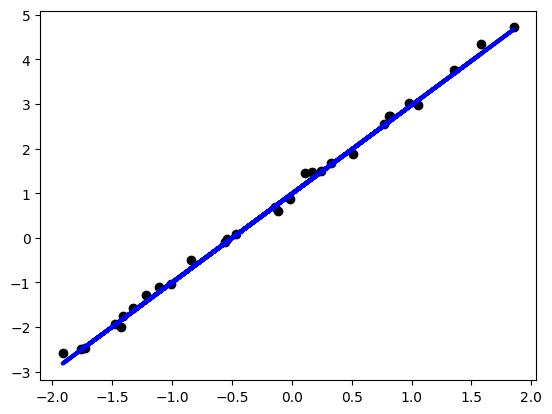

In [12]:
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии
linr = LinearRegression() # создадим ее
linr.fit(x_train.reshape(70, 1), y_train.reshape(70, 1)) # обучим модель, принудительно переформатировав размеры массивов
#linr.fit(x_train, y_train) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) #

y_test_pred=linr.predict(x_test.reshape(30,1))# посчитаем выход модели на тестовых примерах
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)# нарисуем его
plt.scatter(x_test, y_test,  color='black') # и желаемый
plt.show()


Давайте теперь попробуем сделать линейную регрессию на каких-то более-менее реальных данных из примеров `sklearn`. В этом наборе для классификации содержатся 3 класса примеров, количество примеров 59,71,48 для соответствующих классов (всего 178 примеров), каждый пример это 13-мерный вектор из действительных положительных чисел и номер класса.

Нам пригодятся вспомогательные функции `sklearn`:
* `train_test_split()` - случайно разделяющая данные на обучающие и тестовые в заданных долях. Подключаем ее из `sklearn.model_selection`



In [13]:
from sklearn.datasets import load_wine # функция которая загружает набор данных

In [17]:
data_wine = load_wine() # загружаем набор данных
data_wine.target[[10, 80, 140]] # в поле target хранятся номера классов примеров, некоторые из них приведены

array([0, 1, 2])

In [18]:
list(data_wine.target_names) # названия классов в поле target_names

[np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]

In [21]:
X = data_wine.data # в поле data - примеры входов, вектора
y = data_wine.target # Указания учителя = номера классов

from sklearn.model_selection import train_test_split # подключаем функцию для разделения данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # и отдаем 30% на тест, остальное на обучение
#y_train # убедитесь что и в обучении и в тесте есть данные разных классов
y_test #

array([0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 2, 1, 0, 0, 2, 2, 2])

In [22]:
X_train[:3] # первые три примера входов обучающих данных

array([[1.305e+01, 1.730e+00, 2.040e+00, 1.240e+01, 9.200e+01, 2.720e+00,
        3.270e+00, 1.700e-01, 2.910e+00, 7.200e+00, 1.120e+00, 2.910e+00,
        1.150e+03],
       [1.377e+01, 1.900e+00, 2.680e+00, 1.710e+01, 1.150e+02, 3.000e+00,
        2.790e+00, 3.900e-01, 1.680e+00, 6.300e+00, 1.130e+00, 2.930e+00,
        1.375e+03],
       [1.483e+01, 1.640e+00, 2.170e+00, 1.400e+01, 9.700e+01, 2.800e+00,
        2.980e+00, 2.900e-01, 1.980e+00, 5.200e+00, 1.080e+00, 2.850e+00,
        1.045e+03]])

In [23]:
lin_clf = LinearRegression() # создаем модель линейной регресии
lin_clf.fit(X_train, y_train) # обучаем ее
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=2.7095 
Множители a=  [-7.99937115e-02  6.34258564e-02 -2.57484841e-01  4.59597112e-02
  2.67089799e-04  7.74813171e-02 -3.05350741e-01 -1.19793891e-01
  2.09008003e-02  8.85424636e-02 -2.11447431e-02 -2.25969730e-01
 -7.91366755e-04]


Давайте разберемся, что же модель нам предсказала.

Для расчета выходов модели используем `predict()` на тестовых данных. А чтобы посчитать ошибку между действительным и желаемым выходом - `score()` (это приведенная ошибка в диапазоне от 0 до 1).

Посмотрим на визуализацию. Мы не можем рисовать 13-мерные графики, поэтому нарисуем их одномерные проекции.

0.8600739433807612


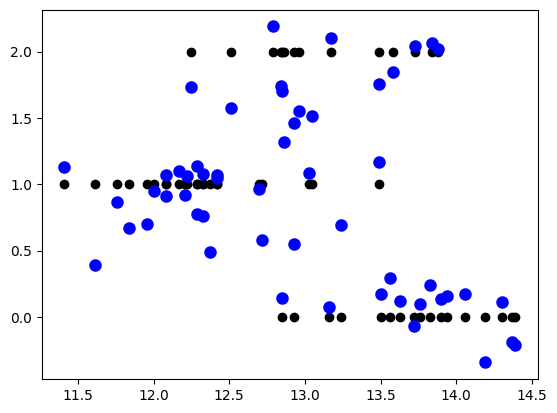

In [24]:
y_predicted = lin_clf.predict(X_test) # рассчитываем выходы модели на тестовых данных
score=lin_clf.score(X_test,y_test)# считаем ошибку
print(score)#
i=0 # номер измерения для построения
plt.scatter(X_test[:,i], y_test,  color='black')# строим желаемые выходы
plt.scatter(X_test[:,i], y_predicted, color='blue', linewidth=3)# и рассчитанные

Не очень-то хорошее приближение.

Но вообще-то мы решаем задачу классификации, а не регрессии. Надо перевести выходы регрессии в номера классов, т.е. как-то *закодировать* классы.

Простой вариант кодирования:  округлим значения выходов до ближайшего целого, если результат меньше 0, то установим 0, если больше 2, то установим 2. Полученное число и будем считать номером класса.

Сравним с указаниями учителя и посчитаем долю правильных (совпадающих) примеров.



In [25]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>2]=2
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score

np.float64(0.8703703703703703)

Итак, хоть ошибка регрессии визуально большая, но для задачи классификации этих данных линейной регрессии достаточно.



Линейная регрессия очень простая модель, может моделировать только линейные зависимости. Не устойчива к *выбросам* - данным, которые резко выбиваются из примерной зависимости остальных данных (например, из-за ошибки измерения). Попробуйте в предыдущих примерах обучить линейную регрессию, на тех же данных, что были в начале нашего урока (почти линейные) но один обучающий пример испортите - сделайте для него выход скажем равным 100. И попробуйте снова обучить модель.      

# Обсуждение и задания
Посчитайте самостоятельно сколько правильно и неправильно угаданных классов, если считать истинный класс 0 если X меньше и класс 1 если больше порога.
Онлайн визуализацию для линейных моделей можно найти здесь.

http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/